# Assignment 2



# Write your name and simon email

Please write names below

* [Name]:Nicolas de Souza
* [email]:ndesouza@simon.rochester.edu




# Exercises 







We will start by redoing the dataset construction of Assignment 1. ( Feel free to use your previous code!)

Start by importing pandas, numpy, maplotlib, and loading the data set. 

The dataset has address 

`url='https://github.com/amoreira2/Lectures/blob/main/assets/data/Assignment1.xlsx?raw=true'`

I strongly recommend you download first and look at the data set.

This file contains multiple sheets, you should use `read_excel` to get the data that contains the 49 value-weighted industry portfolios. 

See here:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html .

Do the followings:

1. Import this dataframe as `df_ind`
    - Use "sheet_name" to select the desired excel sheet. 
    - Use "skip_rows" to skip the initial rows before the data.
    - Figure out what is the code for missing value and change the option `na_values` appropriately
    - If you look at the excel file you will see that there are other data sets stacked horizontally. Use the `usecols` option to select the range of columns you want imported
    - You can take a look at Lab3 material for some examples of importing excel data and using these options.

2. Change the name of the column with the date information to date

3. Use `to_datetime` so python understand the column date as a datetime object (you will have to use the option format)

4. Set date as index

5. convert the date from the start of the month to end of the month.

6. Import the risk-free rate

6. Construct excess returns by subtracting the risk free rate.

7 Drop any missing observations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from pandas.tseries.offsets import MonthEnd


In [2]:
# your code below
url = "https://raw.githubusercontent.com/amoreira2/Fin418/main/assets/data/Assignment1.xlsx"
df_ind = pd.read_excel(url, "49_Industry_Portfolios", skiprows=6, na_values=-99.99, usecols = "A:AW", index_col = 0)
df_ind.index = pd.to_datetime(df_ind.index, format = '%Y%m')+MonthEnd(0)
df_rmrf = pd.read_excel(url, "Market_proxy", skiprows=5, na_values=-99.99, usecols = "A:C", index_col = 0)
df_rmrf.index = pd.to_datetime(df_rmrf.index, format = '%Y%m')+MonthEnd(0)
df_inde = df_ind.subtract(df_rmrf["RF"], axis=0)
df_inde.dropna(axis=0, how='any', inplace=True)
df_inde.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Paper,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin
1969-07-31,-9.24,-7.49,-4.07,-2.60,-5.29,-8.33,-10.72,-11.59,-3.99,-12.58,...,-4.19,-3.67,-13.02,-10.47,-8.81,-10.88,-6.80,-10.73,-13.79,-10.19
1969-08-31,4.08,4.05,4.97,6.17,3.49,5.89,11.03,9.53,4.25,2.01,...,3.61,5.61,5.08,5.81,7.78,8.36,11.77,8.27,14.97,8.56
1969-09-30,0.52,-1.23,4.60,-1.55,3.52,1.25,0.02,-1.27,-1.16,-3.32,...,-2.46,0.56,-2.23,-0.28,-1.37,-1.64,-3.73,6.39,-4.14,-2.91
1969-10-31,15.62,7.39,6.21,11.03,11.82,5.81,12.44,6.90,5.79,6.71,...,6.63,2.87,4.16,10.60,5.63,8.37,10.14,5.10,3.19,9.55
1969-11-30,-2.82,-1.24,-5.44,-3.34,0.09,-8.80,-4.04,-4.41,-2.95,-3.61,...,-4.03,-2.48,-8.45,-7.23,-4.64,-2.99,-8.58,-5.42,-6.96,-7.22


**Exercise 1. Moments**

We will now estimate the risk-premium in each of these portfolio and the covariance between these portfolios.

Do the followings:

1. using the method `mean` on the excess return data frame to obtain a vector of average excess returns which we will use as our ESTIMATE for these portfolio risk-premiums. call this vector `ERe`

2. use `cov` method to estiamte the covariance of excess returns, call this `CovRe`, which we will use as our ESTIMATE for the TRUE covariance matrix between these portfolios

3. Print `ERe` and `CovRe`



In [3]:
# your code below
ERe = df_inde.mean(axis=0)
print(ERe.head())
Stde = df_inde.std(axis=0)
print(Stde.head())
CovRe = df_inde.cov()
print(CovRe.head())

Agric    0.596926
Food     0.737450
Soda     0.747577
Beer     0.745371
Smoke    1.073165
dtype: float64
Agric    6.502605
Food     4.544203
Soda     6.662599
Beer     5.330670
Smoke    6.264143
dtype: float64
           Agric       Food       Soda       Beer      Smoke       Toys  \
Agric  42.283870  13.895412  14.346336  15.357792  13.991825  22.845450   
Food   13.895412  20.649781  17.140947  16.638740  16.557008  17.881736   
Soda   14.346336  17.140947  44.390220  21.477687  16.788400  22.415114   
Beer   15.357792  16.638740  21.477687  28.416039  15.240504  20.739552   
Smoke  13.991825  16.557008  16.788400  15.240504  39.239493  16.990493   

             Fun      Books      Hshld      Clths  ...      Paper      Boxes  \
Agric  25.603373  20.651770  14.086705  22.358837  ...  18.620886  18.503279   
Food   19.822838  16.760152  14.755665  19.149684  ...  14.980794  14.987057   
Soda   27.409492  21.478002  20.069215  23.433387  ...  19.413236  19.693232   
Beer   22.459002  1

**Exercise 2. Storing the weights**


Lets create a storage for our weights. 

Use the `pd.DataFrame` function to create an empty dataframe with name Weights which has as index the name of the different industries in df_ind and column names as 'W1' and 'W2'.

In [4]:
# your code below
Weights = pd.DataFrame(index=df_inde.columns, columns=["W1","W2"])
Weights.head()

,W1,W2
Agric,NaN,NaN
Food,NaN,NaN
Soda,NaN,NaN
Beer,NaN,NaN
Smoke,NaN,NaN


**Exercise 3. Weighting scheme 1**

We will now find the weights by applying the formula

$$ W=E[R^e] @ Var(R^e)^{-1} $$

For that you need to inverse the covariance matrix `CovRe` you just estimated.

You do that using the function `np.linalg.inv`.

Attribute the weight vector to the column 'W1'

Does these weights need to add up to 1? Why? why not? Discuss the interepretation.


In [5]:
# your code below
CovRe_inv = np.linalg.inv(CovRe)
W1 = ERe@CovRe_inv
Weights['W1'] = W1
Weights.head()

,W1,W2
Agric,0.001123,NaN
Food,0.014865,NaN
Soda,0.003134,NaN
Beer,0.009577,NaN
Smoke,0.019813,NaN


**Exercise 4. Weighting scheme 2**

We will now find the weights by applying the formula

$$ W= \frac{\mathbf{1} @ Var(R^e)^{-1}}{\mathbf{1} @ Var(R^e)^{-1} @ \mathbf{1}'} $$

where $\mathbf{1}$ is a vector of 1 that has the length same as the number of assets.

Attribute this vector to the column 'W2'

In [6]:
# your code below
ones = np.ones(len(Weights.index))
W2 = ones@CovRe_inv/(ones@CovRe_inv@ones)
Weights['W2']=W2
print([sum(W1),sum(W2)])
Weights.head()

[0.05067594433753561, 1.0000000000000004]


,W1,W2
Agric,0.001123,0.108446
Food,0.014865,0.084424
Soda,0.003134,-0.012305
Beer,0.009577,0.030482
Smoke,0.019813,-0.015912


**Exercise 5. What mathematical problems weights W1 and W2 are solutions to?**

(This will not be graded. )

In [7]:
# Answer here: 
 
# MVE and MVP


**Exercise 6. Strategy returns**

Use weight W1 and W2 to construct the time series of the strategy returns

The output should be one dataframe called `df_wR` which rows are the dates of `df_inde` and in the columns we have the names `W1` and `W2` and the values are the strategy return implied by the respective weights.



In [8]:
# your code below
df_wR = df_inde @ Weights
df_wR.head()

,W1,W2
1969-07-31,-0.370200,-4.789123
1969-08-31,0.156577,-0.396819
1969-09-30,-0.074467,-3.176717
1969-10-31,0.657064,0.354704
1969-11-30,0.103362,-1.287125


**Exercise 7. Sharpe Ratios**

A key measure of risk-reward is the so called Sharpe ratio. 

the Sharpe ratio is a ratio of the average excess return of a strategy relative to it's standard deviation.

Do the followings:

1. compute the Sharpe ratio for both strategies above and report them in annualized units
2. comment on what you find. is the difference between these Sharpe ratios as expected? explain.

In [9]:
# your code below
Sharpe1 = df_wR['W1'].mean()/(df_wR['W1'].std())*12**0.5
Sharpe2 = df_wR['W2'].mean()/(df_wR['W2'].std())*12**0.5
Sharpe = [Sharpe1, Sharpe2]
print(Sharpe)

[1.1723398092709454, 0.5385913768159623]


In [10]:
# your comments below 

# Yes, we are maximizing the sharpe ratio in the first porfolio, whereas for the second we just care about minimizing the variance.

**Exercise 8. Normalization**

While strategy 2 was solved by imposing a constraint on weights so that they add up to 1, strategy 1 does not impose any constraint on the weights as it imposes a constraint on the expected return target

Imposing a constraint is a choice because we are working with excess returns, so the weights do not need to add up to 1 because these assets cost zero--i.e. each asset is a strategy that is self funded, which invests in the asset with money borrowed at the risk-free rate.

This is all fine and good, but it means that leverage that comes out of the weights $ W1=E[E^e] @ Var(R^e)^{-1} $ is not determinate. Any set of weights proportional to W1 will achieve the same Sharpe Ratio. 

In the exercise below we will trace the entire frontier by changing this proportionality constant.

Do the followings:

1. transform the weights W1 by multiplying it by a constant (your job is to figure out what this constant must be) so that the new strategy associated with these new weights (call it W3) have the same in sample volatility as the strategy associated with W2.

2. record this new strategy in `df_wR`.

3. plot the cumulative returns (as seen for example in Chapter 7) of strategies W2 and W3. Note that stock returns from the data are in percentages, so you may need to rescale the portfolio returns to the unit of 1 when you compute the cumulative returns. 

4. given what you know about their Sharpe Ratios, are the results surprising? explain

**_Hint:_**
$$ K =\sigma(R^e_{p2}) = c\cdot \sigma( R^e_{p1}) = \sigma(c\cdot R^e_{p1}) = \sigma( R^e_{p3})   $$

$$ c = \sigma(R^e_{p2}) / \sigma( R^e_{p1})  $$

$$  R^e_{p3} = c\cdot R^e_{p1} = (\sigma(R^e_{p2}) / \sigma( R^e_{p1})) \cdot R^e_{p1}   $$

0.4594157534843937
             W1        W2        W3
Agric  0.001123  0.108446  0.010185
Food   0.014865  0.084424  0.134765
Soda   0.003134 -0.012305  0.028416
Beer   0.009577  0.030482  0.086827
Smoke  0.019813 -0.015912  0.179624
The sharpe ratios of portfolios W1, W2 and W3 are [1.1723398092709454, 0.5385913768159623, 1.1723398092709456]


<Axes: >

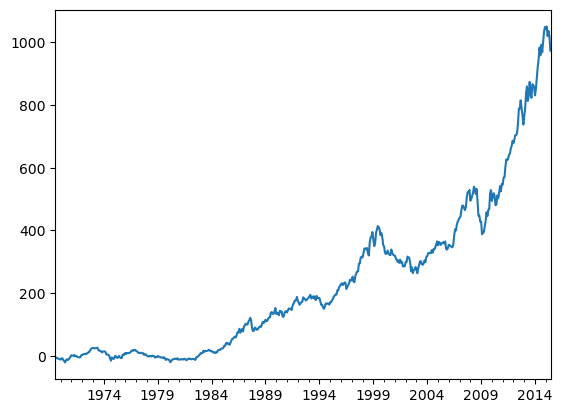

In [11]:
# your code below

# Weighted Mean Variance Efficient Portfolio
c = df_wR["W2"].std()/df_wR["W1"].std()
W3 = W1*c
Weights['W3'] = W3
print(sum(W3))
print(Weights.head())

# Strategy Returns
df_wR['W3'] = df_inde @ W3

# Sharpe Ratios
Sharpe3 = (df_wR['W3'].mean()/df_wR['W3'].std())*12**0.5

print(f'The sharpe ratios of portfolios W1, W2 and W3 are {[Sharpe1, Sharpe2, Sharpe3]}')

# Cumulative Returns
gross = df_wR/100 + 1 #gross returns
cum_ret = (gross.cumprod(axis=0)-1)*100

cum_ret["W2"].plot()

<Axes: >

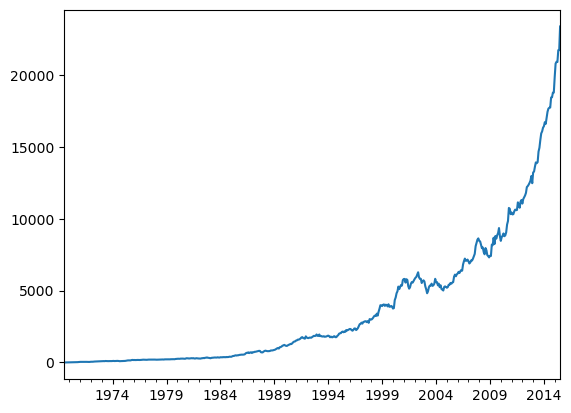

In [12]:
cum_ret["W3"].plot()

In [13]:
# your explanation below


**Exercise 8. The Efficient Frontier 1**

We will now construct the investment frontier using portfolio strategy `W1`. 

The key idea is that any portolio that is in the frontier must have returns of the form 

$$
\begin{align} 
r^{frontier} &= w \cdot r^f+(1-w)(W1 @ R) \\
&= r^f+(1-w)(W1 @ (R-rf)) \\
&= r^f+w (W1 @ R^{e})
\end{align}
$$

In terms of weights, the frontier is of the form $[1,w*W1]$ that is, a weight 1 on the risk-free rate plus a weight $w*W1$ on the long-short portfolios $R^e$, where $w$ is any scalar greater than 0 and $W1$ is the weight that solves the problem you described in question 10.

This means that we can write any portfolio in the efficient frontier as:

$$E[R^{frontier}]=r^f+w W1 E[R^e]$$


$$STD[R^{frontier}]=STD[r^f+wW1 R^{e}]=wSTD[W1 R^{e}]$$

Thus to trace-out the frontier you will need the mean and the volatility of the portfolio constructed with weights `W1`

Do the followings to plot the frontier:

1. plot the mean-standard deviation efficient frontier by varying the weight $w$ in the expression above from zero to some positive value $\bar{w}$

2. pick $\bar{w}$ consistent with an **annual** volatility equal to 20%, so that it traces out the frontier up to the point that you have a volatility of 20%. 

3. the plot should have $wSTD[W1 R^{e}]$ in the x-axis and $r^f+w W1 E[R^e]$ in the y-axis. 

4. both mean and standard deviation should be annualized.

**_Hint:_**
find the upper bound of $w$ and then use `np.linspace` to create a array of $w$.



0.11723398092709444
1.705990007490884


Text(0, 0.5, 'Expected Return')

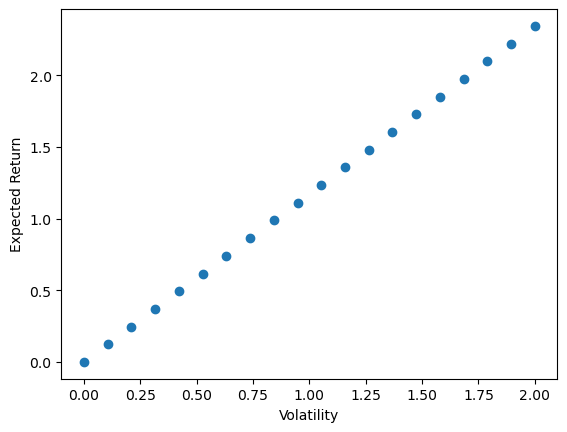

In [14]:
# your code below

# Finding w such that the portfolio volatility equals 20%, annualized
w_bar = 0.2/(((df_wR["W1"]*0.1).std())*12**0.5)
print(((df_wR["W1"]*0.1).std())*12**0.5)
print(w_bar)

# weight grid
w_grid = np.linspace(0,w_bar,20)

# Portfolio Std and Return
Std_p = []
ERe_p = []
rf = df_rmrf.loc['2015-11-30', "RF"]

for w in w_grid:
    Std_p.append((w*df_wR["W1"].std()*12**0.5))
    ERe_p.append((rf + w*df_wR["W1"].mean())*12)

plt.scatter(Std_p,ERe_p)
plt.xlabel('Volatility')
plt.ylabel('Expected Return')


**Exercise 9. Risk free rates?**

Which risk-free rate should you use in the question above? The historical average? The current one? What do you think?




In [15]:
# Answer here: 

# The current one

**Exercise 10. The Efficient frontier 2**

For contrast, plot the means and standard deviations of the individual industry portfolio in the same plot above. So these will be additional 49 points in the same plot.

What do you notice about the efficient frontier? Why that makes sense?

**_Hint:_** you might find `plt.scatter` useful.

In [16]:
# your code below

# Let's appennd the std and the average returns for each industry to the vectors Std_p and ERe_p above

for i in ERe.index:
    Std_p.append(Stde.loc[i]*12**0.5)
    ERe_p.append(ERe.loc[i]*12)    
    

Text(0, 0.5, 'Expected Return')

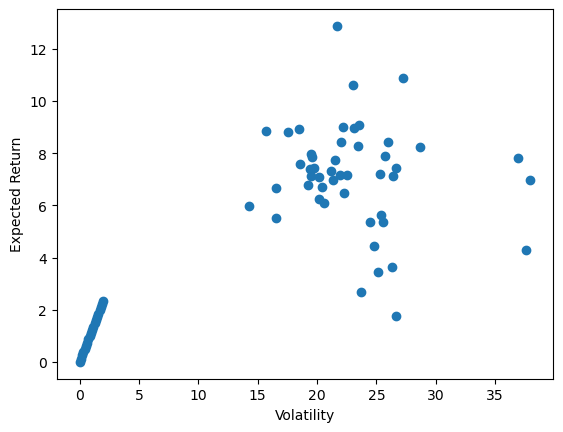

In [17]:
plt.scatter(Std_p,ERe_p)
plt.xlabel('Volatility')
plt.ylabel('Expected Return')

In [ ]:
# efficient frontier has higher sharpe than any individual industry. 